## Деревья решений

### Подключение библиотек

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings

from sklearn import tree 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

# Отключим предупреждения компилятора
warnings.filterwarnings('ignore') 

### Загрузка набора данных Iris

Набор данных содержит в себе следующие столбцы:
1. *Признаки или независимые переменные*
- **sepal_length** - длина чашелистика в сантиметрах
- **sepal_width** - ширина чашелистика в сантиметрах
- **petal_lenght** - длина лепестка в сантиметрах
- **petal_width** - ширина лепестка в сантиметрах
2. *Результат или зависимая переменная*
- **species** - вид или сорт ириса

Количество сортов ириса: **3** (*Setosa*, *Virginica*, *Versicolor*)<br>
Количество экземпляров данных для каждого сорта: **50**<br>
Количество строк в наборе данных: **150**

In [2]:
# Загрузим датасет Iris с помощью библиотеки seaborn
df = sns.load_dataset('iris') 

### Визуализация данных

Представим данные в виде таблицы

In [3]:
# Выведем первые пять строк датасета
df.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Представим данные в виде графиков плотности (*Density Graph*).<br>
- Ось абсцисс описывает шкалу соответствующего признака для сортов ириса.<br>
- Ось ординат описывает плотность экземпляров сорта ириса, которые имеют соответствующее значение признака. <br>

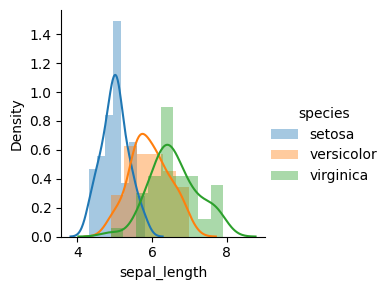

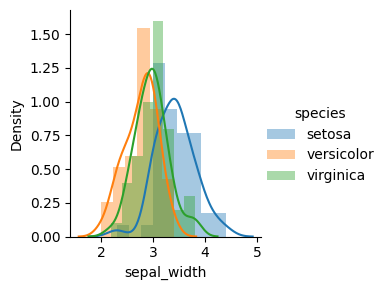

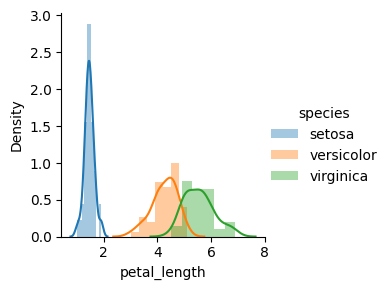

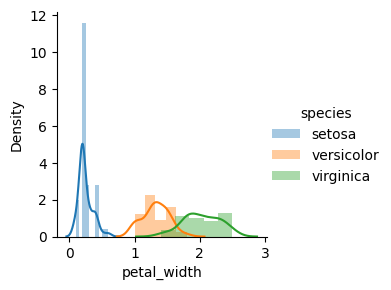

In [4]:
# Инициализируем графики признаков сортов ириса
sns.FacetGrid(df, hue="species").map(sns.distplot, "sepal_length").add_legend()
sns.FacetGrid(df, hue="species").map(sns.distplot, "sepal_width").add_legend()
sns.FacetGrid(df, hue="species").map(sns.distplot, "petal_length").add_legend() 
sns.FacetGrid(df, hue="species").map(sns.distplot, "petal_width").add_legend() 

# Вывод графиков на экран
plt.show()

### Реализация классификатора дерева решений на основе набора данных Iris

1. Возьмем в отдельные переменные признаки (*X*) и результаты (*y*) из нашего датасета.<br>
2. Разделим набор данных на обучающую (*X_train*, *y_train*) и тестовую (*X_test*, *y_test*) выборки.
3. Обучим дерево решений на обучающей выборке.

In [5]:
# Определение признаков и результатов в наборе данных
X = df.iloc[:, :-2]  # Признаки из набора данных
y = df.species  # Результаты из набора данных

# Разделение набора данных на выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,  # На 33% будем тестировать дерево, на 67% обучать
                                                    random_state=1) 
# Создание обучение классификатора дерева решений
clf = DecisionTreeClassifier().fit(X_train, y_train)

### Тестирование классификатора дерева решений

1. Предскажем с помощью классификатора результаты *y_pred* в зависимости от значений признаков.
2. Сравним полученные значения с тестовыми *y_test* и рассчитаем долю правильных ответов.

Стандартный узел дерева имеет следующую структуру данных:
- **x[n]**, *где n - индекс признака* - вопрос или условие отбора данных из выборки по значению признака.
- **gini** - оценка Джини. Если она равна 0, то все объекты принадлежат одному классу (сорту).
- **samples** - общее количество элементов выборки.
- **values** - разделение выборки на классы (сорта) с указанием количества элементов.

Листы дерева показывают, что все элементы выборки принадлежат одному классу.

*classification_report* - 
- **precision** - доля объектов, названных классификатором положительными и при этом действительно являющимися положительными. То есть, определяет вероятность наличия данного класса в выборке экземпляров.
- **recall** - доля объектов положительного класса, 
- **f1-score** - 
- **support** -

*confusion_matrix* - матрица ошибок или несоответствий. 

[Accuracy score on test set]: 0.96
[Accuracy score on train set]: 1.0
[Classification report for test set]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.95      0.95      0.95        19
   virginica       0.93      0.93      0.93        14

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

[Confusion matrix for test set]
[[17  0  0]
 [ 0 18  1]
 [ 0  1 13]]
-----------------------------------------------------
[Classification report for train set]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        33
  versicolor       1.00      1.00      1.00        31
   virginica       1.00      1.00      1.00        36

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00  

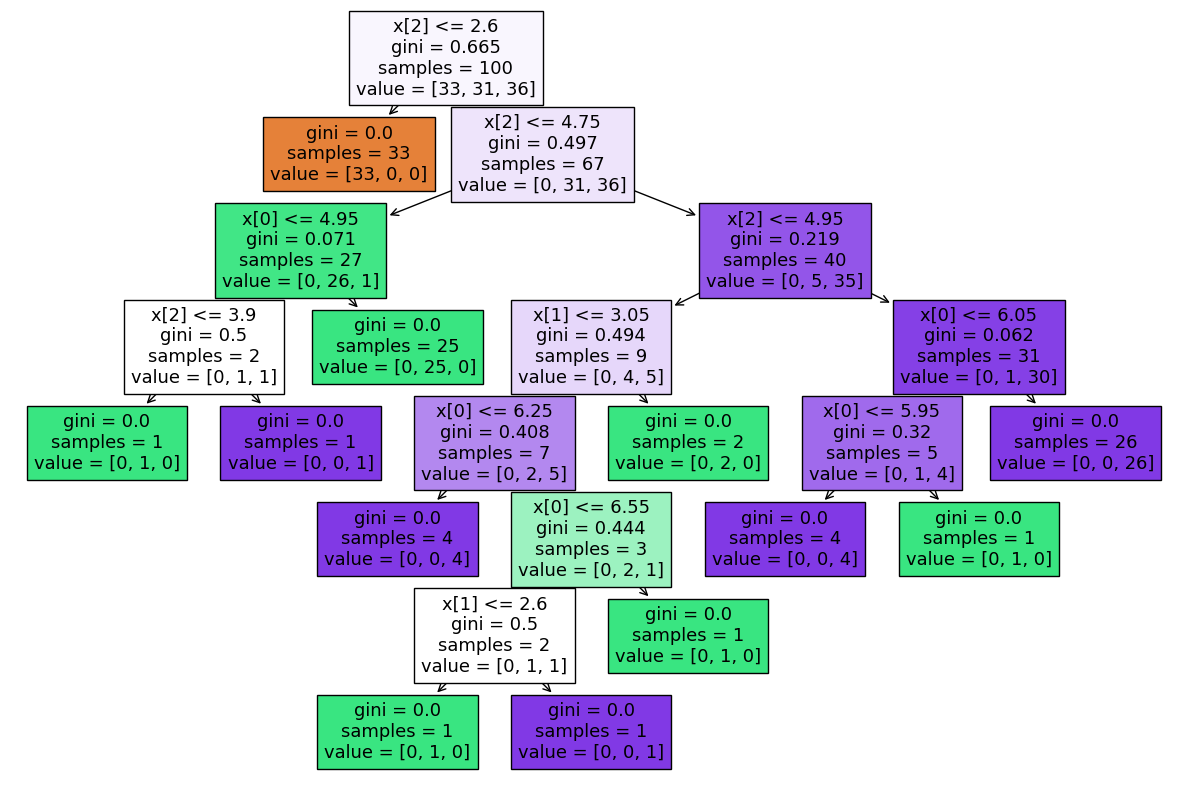

In [6]:
# Тестирование классификатора
y_pred_train = clf.predict(X_train)  # Предсказываем результаты на основе обучающей выборке
y_pred_test = clf.predict(X_test)  # Предсказываем результаты на основе тестовой выборки признаков

# Вывод дерева решений на экран
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True)

# Выводим результаты тестирования
print('[Accuracy score on test set]:', accuracy_score(y_pred_test, y_test))  # Доля правильных ответов на тестовой выборке
print('[Accuracy score on train set]:', accuracy_score(y_pred_train, y_train))  # Доля правильных ответов на обучающей выборке
print('=====================================================')
print('[Classification report for test set]')
print(classification_report(y_pred_test, y_test))
print('[Confusion matrix for test set]')
print(confusion_matrix(y_test, y_pred_test))
print('-----------------------------------------------------')
print('[Classification report for train set]')
print(classification_report(y_pred_train, y_train))
print('[Confusion matrix for train set]')
print(confusion_matrix(y_train, y_pred_train))

Попробуем изменить параметры классификатора.

Усечем дерево

[Accuracy score on test set]: 0.98
[Accuracy score on train set]: 0.97
[Classification report for test set]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.95      0.97        20
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

[Confusion matrix for test set]
[[17  0  0]
 [ 0 19  0]
 [ 0  1 13]]
-----------------------------------------------------
[Classification report for train set]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        33
  versicolor       0.90      1.00      0.95        28
   virginica       1.00      0.92      0.96        39

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97 

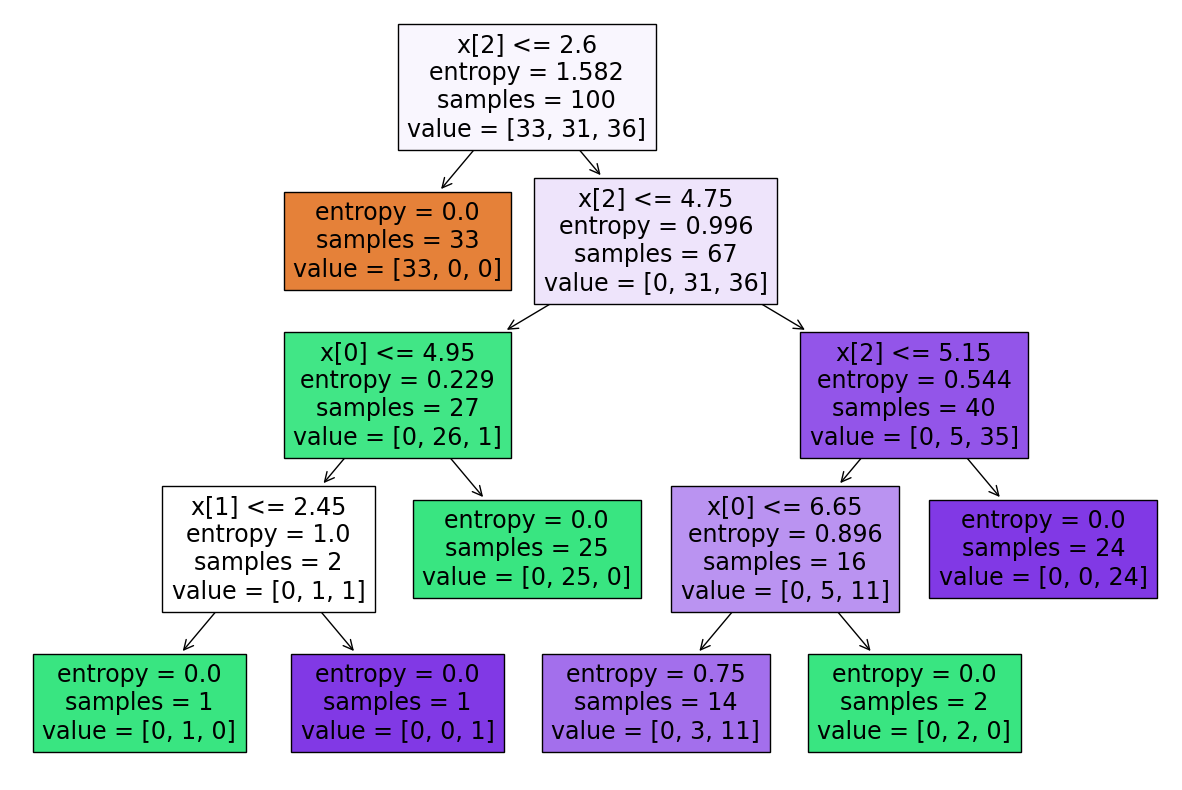

In [8]:
# Создадим классификатор дерево решений
clf = DecisionTreeClassifier(criterion='entropy',  # Мера неопределенности - энтропия
                             max_depth=4,  # Глубина дерева
                            random_state=2)  

# Обучаем дерево решений
clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)  # Предсказываем результаты на основе тестовых признаках
y_pred_train = clf.predict(X_train) # Предсказываем результаты на основе обучающих признаках

# Вывод дерева решений на экран
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True)

# Выводим результаты тестирования
print('[Accuracy score on test set]:', accuracy_score(y_pred_test, y_test))  # Доля правильных ответов на тестовой выборке
print('[Accuracy score on train set]:', accuracy_score(y_pred_train, y_train))  # Доля правильных ответов на обучающей выборке
print('=====================================================')
print('[Classification report for test set]')
print(classification_report(y_pred_test, y_test))
print('[Confusion matrix for test set]')
print(confusion_matrix(y_test, y_pred_test))
print('-----------------------------------------------------')
print('[Classification report for train set]')
print(classification_report(y_pred_train, y_train))
print('[Confusion matrix for train set]')
print(confusion_matrix(y_train, y_pred_train))